In [1]:
# Our data management libraries
import pandas as pd
import numpy as np

# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

## Initializing the dataset

In [2]:
df = pd.read_csv('../dataset/long_beach_dataset.csv')
df.head()

,Animal ID,Animal Name,Animal Type,Primary Color,Secondary Color,Sex,DOB,Age,Intake Date,Intake Condition,...,Intake Subtype,Reason for Intake,Outcome Date,Crossing,Jurisdiction,Outcome Type,Outcome Subtype,intake_is_dead,outcome_is_dead,was_outcome_alive
0,A414780,HAPPY,CAT,ORANGE,WHITE,Neutered,2010-04-25,13.0,2021-09-08,NORMAL,...,OTC,NaN,2021-12-15,"3900 BLK FALCON AVE, LONG BEACH, CA 90807",LONG BEACH,ADOPTION,PFE/PAWSHP,Alive on Intake,False,1
1,A458315,PELE,CAT,ORANGE,NaN,Spayed,2010-06-28,13.0,2018-10-21,NORMAL,...,OTC,DIVORCE,2019-01-23,"800 LINDEN AVE, LONG BEACH, CA 90813",LONG BEACH,ADOPTION,PFE/PAWSHP,Alive on Intake,False,1
2,A510845,MITZIE,CAT,TRICOLOR,NaN,Spayed,2012-09-28,11.0,2021-08-04,NORMAL,...,OTC,OWNER PROB,2021-08-21,"2600 BLK EUCALYPTUS AVE, LONG BEACH, CA 90806",LONG BEACH,ADOPTION,WEB,Alive on Intake,False,1
3,A516312,BELL,CAT,BLACK,NaN,Spayed,2013-05-12,10.0,2017-01-18,FERAL,...,OTC,ALLERGIC,2017-02-19,"1300 E HARDING ST, LONG BEACH, CA 90805",LONG BEACH,ADOPTION,WALKIN,Alive on Intake,False,1
4,A556069,SNOW,CAT,FLAME PT,NaN,Neutered,2014-06-01,9.0,2022-06-04,NORMAL,...,OTC,NaN,2022-07-22,"5400 BLK LEMON AVE, LONG BEACH, CA 90805",LONG BEACH,ADOPTION,WEB,Alive on Intake,False,1


In [3]:
# renaming columns title

# Use the rename method with a dictionary to specify the new column names
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.head()

,animal_id,animal_name,animal_type,primary_color,secondary_color,sex,dob,age,intake_date,intake_condition,...,intake_subtype,reason_for_intake,outcome_date,crossing,jurisdiction,outcome_type,outcome_subtype,intake_is_dead,outcome_is_dead,was_outcome_alive
0,A414780,HAPPY,CAT,ORANGE,WHITE,Neutered,2010-04-25,13.0,2021-09-08,NORMAL,...,OTC,NaN,2021-12-15,"3900 BLK FALCON AVE, LONG BEACH, CA 90807",LONG BEACH,ADOPTION,PFE/PAWSHP,Alive on Intake,False,1
1,A458315,PELE,CAT,ORANGE,NaN,Spayed,2010-06-28,13.0,2018-10-21,NORMAL,...,OTC,DIVORCE,2019-01-23,"800 LINDEN AVE, LONG BEACH, CA 90813",LONG BEACH,ADOPTION,PFE/PAWSHP,Alive on Intake,False,1
2,A510845,MITZIE,CAT,TRICOLOR,NaN,Spayed,2012-09-28,11.0,2021-08-04,NORMAL,...,OTC,OWNER PROB,2021-08-21,"2600 BLK EUCALYPTUS AVE, LONG BEACH, CA 90806",LONG BEACH,ADOPTION,WEB,Alive on Intake,False,1
3,A516312,BELL,CAT,BLACK,NaN,Spayed,2013-05-12,10.0,2017-01-18,FERAL,...,OTC,ALLERGIC,2017-02-19,"1300 E HARDING ST, LONG BEACH, CA 90805",LONG BEACH,ADOPTION,WALKIN,Alive on Intake,False,1
4,A556069,SNOW,CAT,FLAME PT,NaN,Neutered,2014-06-01,9.0,2022-06-04,NORMAL,...,OTC,NaN,2022-07-22,"5400 BLK LEMON AVE, LONG BEACH, CA 90805",LONG BEACH,ADOPTION,WEB,Alive on Intake,False,1


# Data cleaning begins here (round 1)

### Calculating days stayed value

In [4]:
df = df.dropna(subset=['dob'])
df['days_stayed'] = (pd.to_datetime(df['outcome_date'], format='%Y/%m/%d') - pd.to_datetime(df['intake_date'], format='%Y/%m/%d')).dt.days.astype(int)

# Convert 'Date of Birth' to datetime format
df['dob'] = pd.to_datetime(df['dob'])
df['intake_date'] = pd.to_datetime(df['intake_date'])

# Calculate age based on the Intake date
df['intake_age'] = (df['intake_date'] - df['dob']).astype('<m8[Y]')
df.head()



,animal_id,animal_name,animal_type,primary_color,secondary_color,sex,dob,age,intake_date,intake_condition,...,outcome_date,crossing,jurisdiction,outcome_type,outcome_subtype,intake_is_dead,outcome_is_dead,was_outcome_alive,days_stayed,intake_age
0,A414780,HAPPY,CAT,ORANGE,WHITE,Neutered,2010-04-25,13.0,2021-09-08,NORMAL,...,2021-12-15,"3900 BLK FALCON AVE, LONG BEACH, CA 90807",LONG BEACH,ADOPTION,PFE/PAWSHP,Alive on Intake,False,1,98,11.0
1,A458315,PELE,CAT,ORANGE,NaN,Spayed,2010-06-28,13.0,2018-10-21,NORMAL,...,2019-01-23,"800 LINDEN AVE, LONG BEACH, CA 90813",LONG BEACH,ADOPTION,PFE/PAWSHP,Alive on Intake,False,1,94,8.0
2,A510845,MITZIE,CAT,TRICOLOR,NaN,Spayed,2012-09-28,11.0,2021-08-04,NORMAL,...,2021-08-21,"2600 BLK EUCALYPTUS AVE, LONG BEACH, CA 90806",LONG BEACH,ADOPTION,WEB,Alive on Intake,False,1,17,8.0
3,A516312,BELL,CAT,BLACK,NaN,Spayed,2013-05-12,10.0,2017-01-18,FERAL,...,2017-02-19,"1300 E HARDING ST, LONG BEACH, CA 90805",LONG BEACH,ADOPTION,WALKIN,Alive on Intake,False,1,32,3.0
4,A556069,SNOW,CAT,FLAME PT,NaN,Neutered,2014-06-01,9.0,2022-06-04,NORMAL,...,2022-07-22,"5400 BLK LEMON AVE, LONG BEACH, CA 90805",LONG BEACH,ADOPTION,WEB,Alive on Intake,False,1,48,8.0


### Creating new dataset for visualization with required columns only

***Observation: 'primary_color', 'sex', 'age', 'intake_condition', 'days_stayed' are the columns we need for our data model, so we will only select those***

In [5]:
selected_columns = ['primary_color', 'sex', 'intake_age', 'intake_condition', 'intake_type' , 'days_stayed']
selected_df = df[selected_columns]
selected_df = selected_df.dropna(subset=['intake_age', 'days_stayed'])

## check null values

In [6]:
# 1. Print the number of null rows we have in our dataframe.
print(selected_df.isnull().sum())

primary_color       0
sex                 0
intake_age          0
intake_condition    0
intake_type         0
days_stayed         0
dtype: int64


In [7]:
print(selected_df['intake_age'].isna().sum())
print(selected_df['days_stayed'].isna().sum())

0
0


In [8]:
selected_df= selected_df[selected_df['intake_age']>=0]
print(selected_df['days_stayed'].isna().sum())

0


In [9]:
print(selected_df['days_stayed'].min())

0


## check for duplicate values

In [10]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(selected_df.duplicated().sum())

338


In [11]:
# Check for duplicated rows considering all columns
duplicated_rows = selected_df.duplicated(keep=False)

# Print the rows that are duplicated
print("Duplicated Rows:")
print(selected_df[duplicated_rows])

Duplicated Rows:
     primary_color       sex  intake_age intake_condition intake_type  \
6            BLACK    Female         0.0           NORMAL       STRAY   
11           BLACK    Spayed         0.0           NORMAL       STRAY   
15          CALICO    Female         0.0           NORMAL       STRAY   
22       BRN TABBY    Female         0.0           NORMAL       STRAY   
26           BLACK  Neutered         0.0           NORMAL       STRAY   
...            ...       ...         ...              ...         ...   
3031         BLACK    Spayed         0.0           NORMAL       STRAY   
3039     BRN TABBY    Spayed         0.0           NORMAL       STRAY   
3045          GRAY    Spayed         0.0           NORMAL       STRAY   
3052         BLACK  Neutered         0.0           NORMAL       STRAY   
3054         BLACK  Neutered         0.0         ILL MILD       STRAY   

      days_stayed  
6              16  
11             19  
15             12  
22              8  
26    

In [12]:
selected_df= selected_df.drop_duplicates(keep='first')

In [13]:
# Recheck the number of duplicate rows we have in our dataframe.
print(selected_df.duplicated().sum())

0


# Data ploting and visualization begins here

### Graphing individual columns

In [14]:
# our working dataframe
selected_df['intake_age'] = selected_df['intake_age'].astype(int)
selected_df.head()

,primary_color,sex,intake_age,intake_condition,intake_type,days_stayed
0,ORANGE,Neutered,11,NORMAL,STRAY,98
1,ORANGE,Spayed,8,NORMAL,OWNER SURRENDER,94
2,TRICOLOR,Spayed,8,NORMAL,OWNER SURRENDER,17
3,BLACK,Spayed,3,FERAL,OWNER SURRENDER,32
4,FLAME PT,Neutered,8,NORMAL,OWNER SURRENDER,48


In [15]:
# checking the shape of our new dataset
print(selected_df.shape)

(2692, 6)


## Analysing primary_color column & ploting bar plot

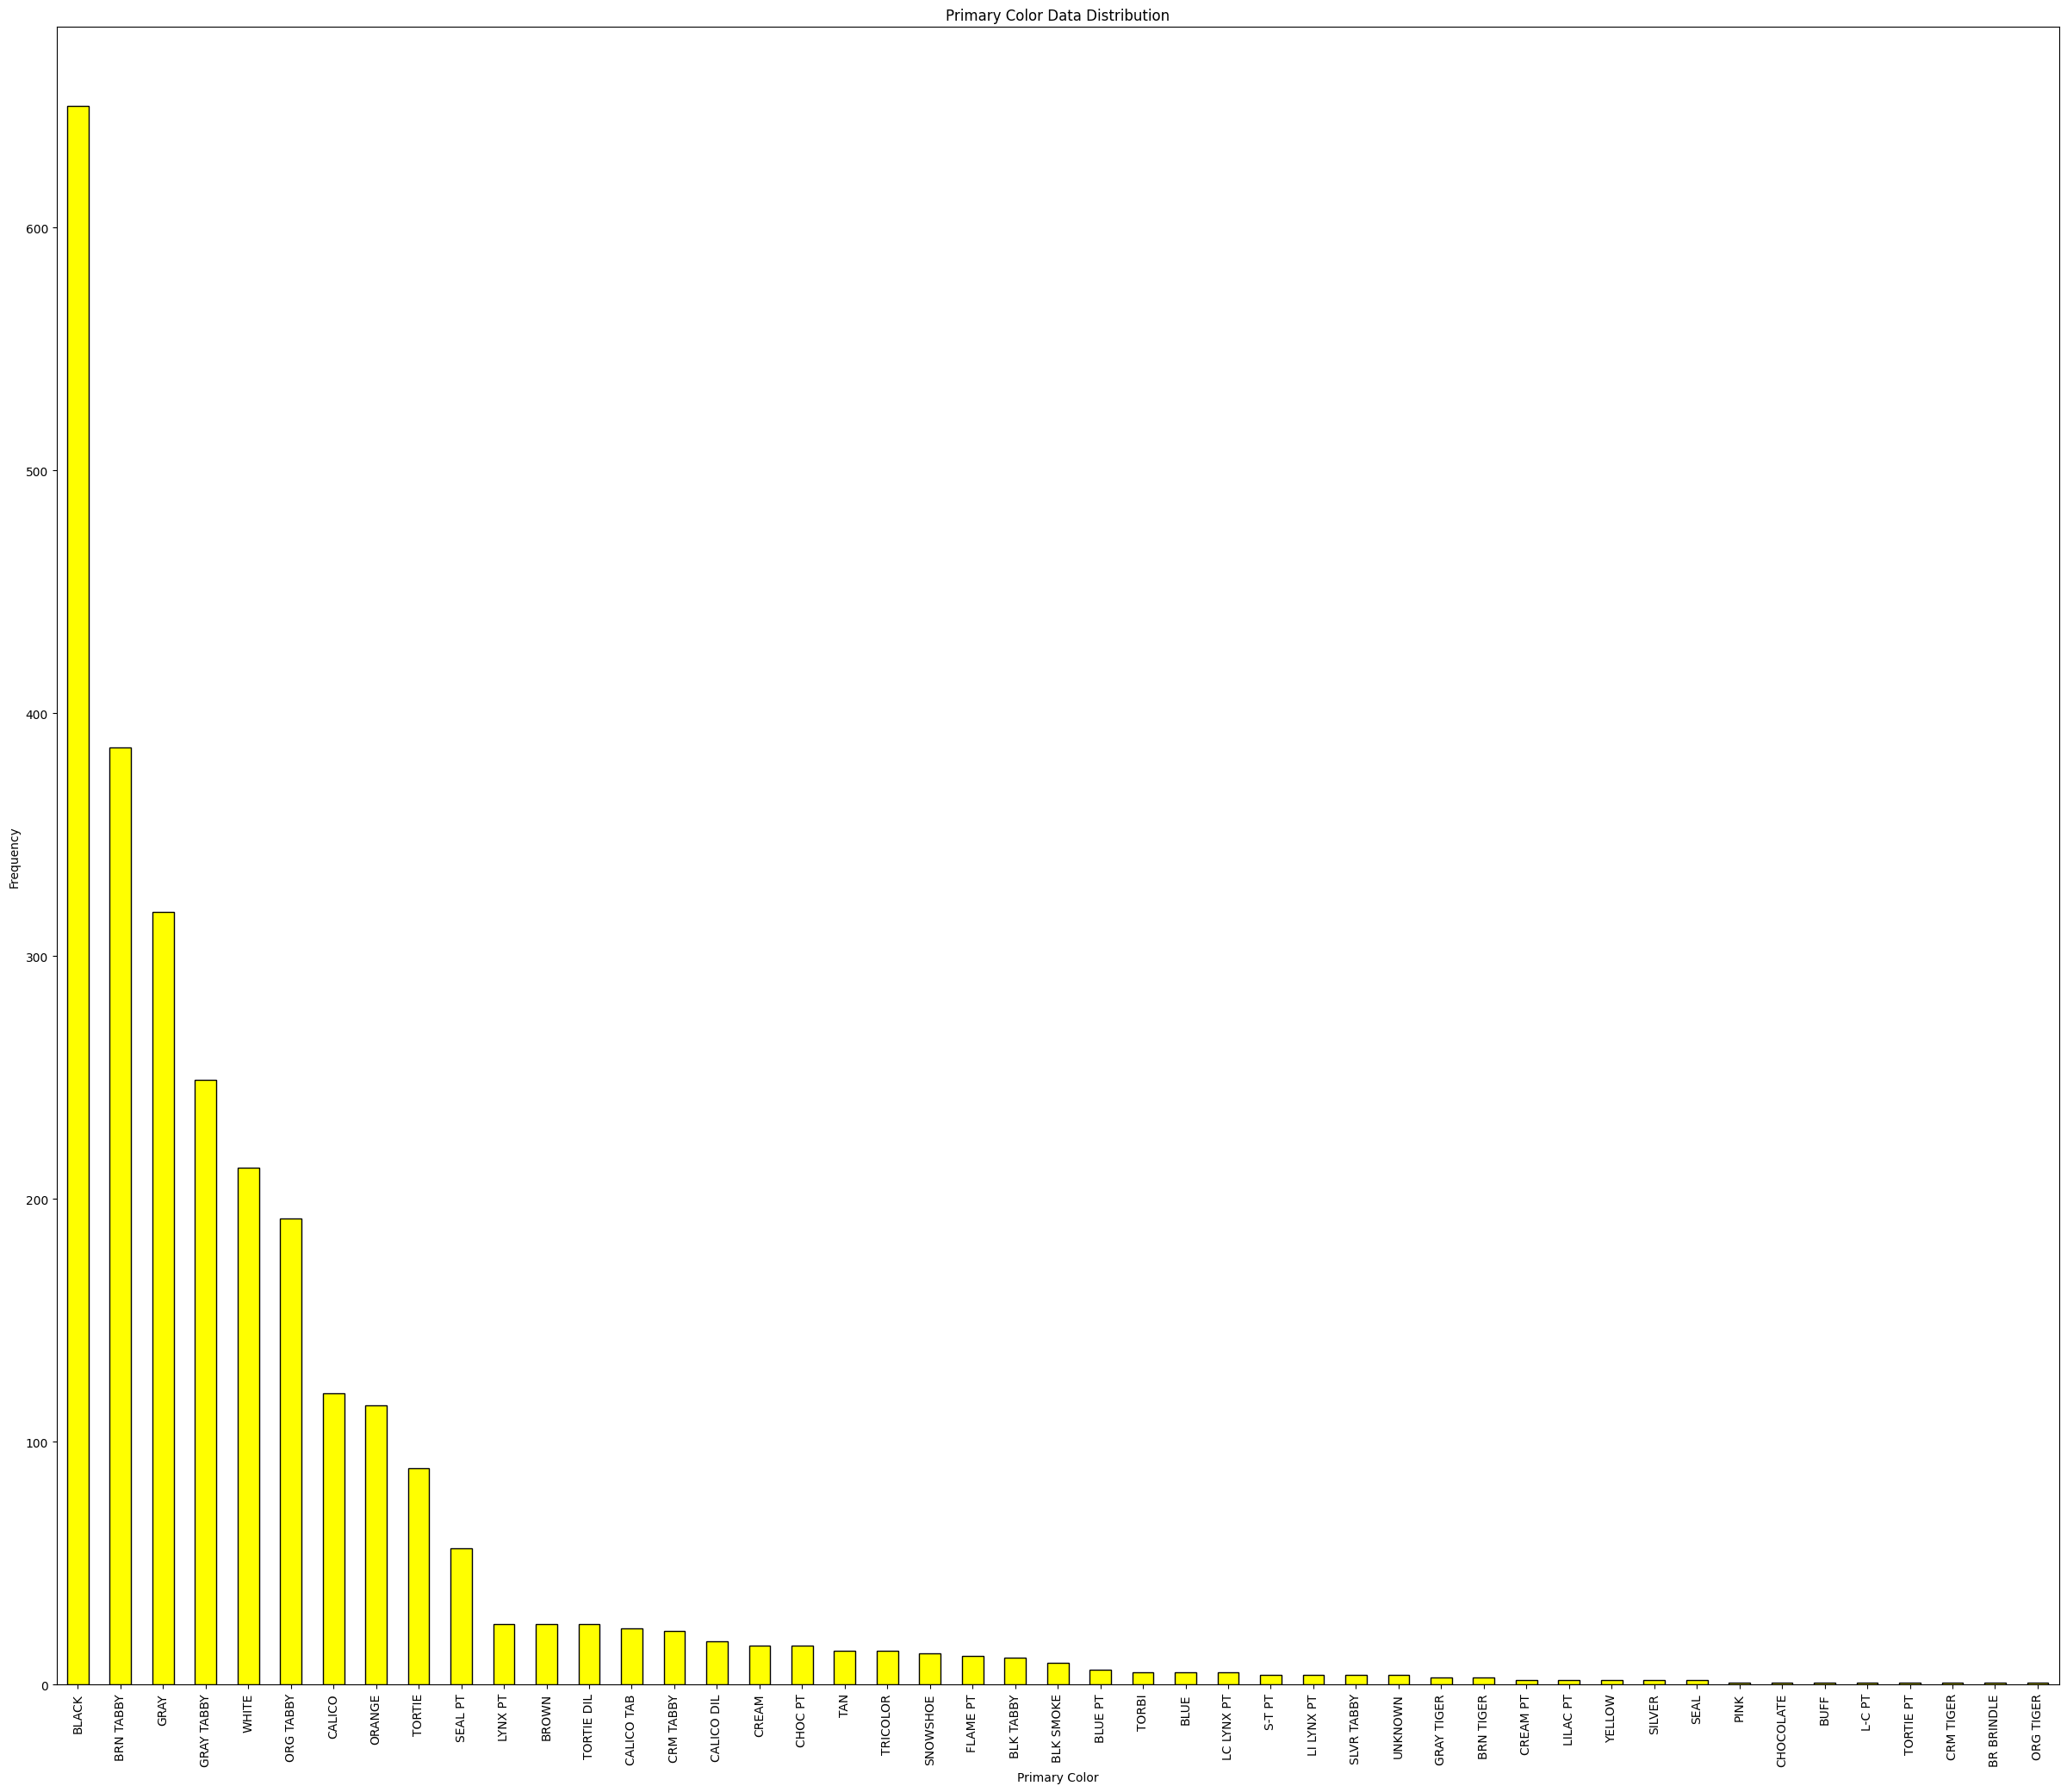

In [17]:
color_category_counts.plot(kind='bar', color='yellow', edgecolor='black', figsize= (30,25))

# Adding labels and title
plt.xlabel('Primary Color')
plt.ylabel('Frequency')
plt.title('Primary Color Data Distribution')

# Display the plot
plt.show()

In [16]:
color_category_counts = selected_df['primary_color'].value_counts()
color_category_counts

BLACK         650
BRN TABBY     386
GRAY          318
GRAY TABBY    249
WHITE         213
ORG TABBY     192
CALICO        120
ORANGE        115
TORTIE         89
SEAL PT        56
LYNX PT        25
BROWN          25
TORTIE DIL     25
CALICO TAB     23
CRM TABBY      22
CALICO DIL     18
CREAM          16
CHOC PT        16
TAN            14
TRICOLOR       14
SNOWSHOE       13
FLAME PT       12
BLK TABBY      11
BLK SMOKE       9
BLUE PT         6
TORBI           5
BLUE            5
LC LYNX PT      5
S-T PT          4
LI LYNX PT      4
SLVR TABBY      4
UNKNOWN         4
GRAY TIGER      3
BRN TIGER       3
CREAM PT        2
LILAC PT        2
YELLOW          2
SILVER          2
SEAL            2
PINK            1
CHOCOLATE       1
BUFF            1
L-C PT          1
TORTIE PT       1
CRM TIGER       1
BR BRINDLE      1
ORG TIGER       1
Name: primary_color, dtype: int64

## Data cleaning for 'primary_color'

### Simplifing the color categories

**we can see here we have about 32 different colors and most of them has very low frequency, so we will reduce the number of category by assigning to common categories**

In [18]:
def assign_color(input_string):
    if 'TABBY' in input_string or 'TAB' in input_string:
        return 'TABBY'
    elif 'BLACK' in input_string:
        return 'BLACK'
    elif 'WHITE' in input_string:
        return 'WHITE'
    elif 'GRAY' in input_string:
        return 'GRAY'
    else:
        return 'OTHER'

selected_df['simplified_color'] = selected_df['primary_color'].apply(assign_color)

selected_df.head()

,primary_color,sex,intake_age,intake_condition,intake_type,days_stayed,simplified_color
0,ORANGE,Neutered,11,NORMAL,STRAY,98,OTHER
1,ORANGE,Spayed,8,NORMAL,OWNER SURRENDER,94,OTHER
2,TRICOLOR,Spayed,8,NORMAL,OWNER SURRENDER,17,OTHER
3,BLACK,Spayed,3,FERAL,OWNER SURRENDER,32,BLACK
4,FLAME PT,Neutered,8,NORMAL,OWNER SURRENDER,48,OTHER


## Data visualization after cleaning for 'color'

In [19]:
color_category_counts2 = selected_df['simplified_color'].value_counts()
color_category_counts2

TABBY    887
BLACK    650
OTHER    621
GRAY     321
WHITE    213
Name: simplified_color, dtype: int64

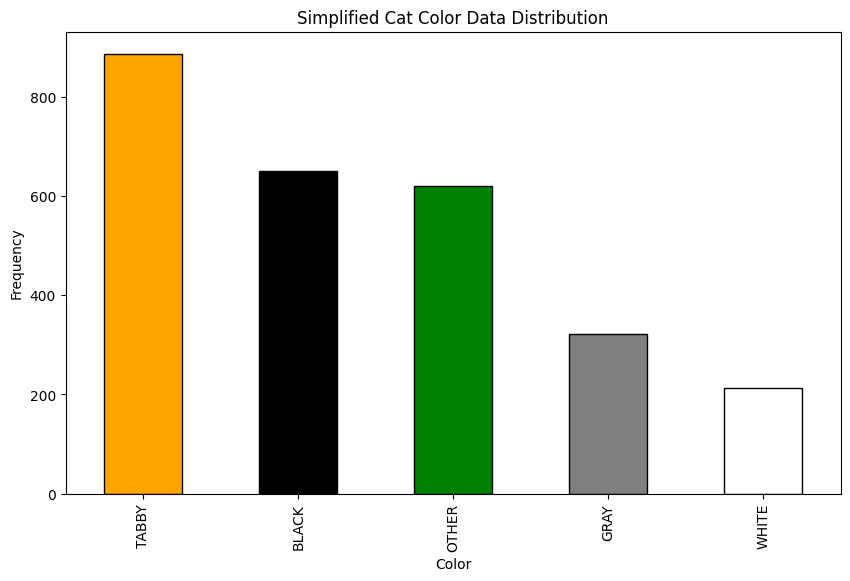

In [20]:
import matplotlib.pyplot as plt

# Assuming category_counts2 is your Series
# color_category_counts2 = pd.Series({'TABBY': 949, 'BLACK': 744, 'OTHER': 626, 'GRAY': 333, 'WHITE': 219})

# Create a color dictionary for each category
color_dict = {'TABBY': 'orange', 'BLACK': 'black', 'OTHER': 'green', 'GRAY': 'gray', 'WHITE': 'white'}

# Plot the bar chart with specified colors
color_category_counts2.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in color_category_counts2.index])

# Adding labels and title
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Simplified Cat Color Data Distribution')

# Display the plot
plt.show()


## Analysing 'sex' column & ploting bar plot

In [21]:
sex_category_counts = selected_df['sex'].value_counts()
sex_category_counts

Neutered    1159
Spayed      1129
Female       205
Male         194
Unknown        5
Name: sex, dtype: int64

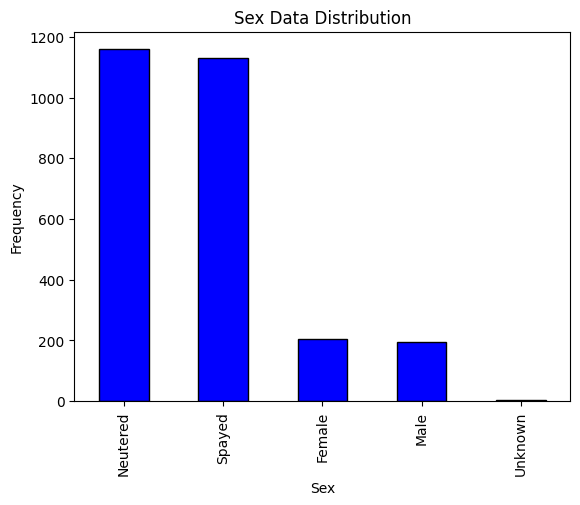

In [22]:
# ploting bar plot for sex column

category_counts = selected_df['sex'].value_counts()
category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Sex Data Distribution')

# Display the plot
plt.show()

### Removing unknown type

In [23]:
selected_df= selected_df[selected_df['sex'] != 'Unknown']
selected_df.head()

,primary_color,sex,intake_age,intake_condition,intake_type,days_stayed,simplified_color
0,ORANGE,Neutered,11,NORMAL,STRAY,98,OTHER
1,ORANGE,Spayed,8,NORMAL,OWNER SURRENDER,94,OTHER
2,TRICOLOR,Spayed,8,NORMAL,OWNER SURRENDER,17,OTHER
3,BLACK,Spayed,3,FERAL,OWNER SURRENDER,32,BLACK
4,FLAME PT,Neutered,8,NORMAL,OWNER SURRENDER,48,OTHER


In [24]:
def assign_sex(input_string):
    if 'Male' in input_string or 'Neutered'in input_string:
        return 'MALE'
    elif 'Female' in input_string or 'Spayed'in input_string:
        return 'FEMALE'

selected_df['simplified_sex'] = selected_df['sex'].apply(assign_sex)

selected_df.head()

,primary_color,sex,intake_age,intake_condition,intake_type,days_stayed,simplified_color,simplified_sex
0,ORANGE,Neutered,11,NORMAL,STRAY,98,OTHER,MALE
1,ORANGE,Spayed,8,NORMAL,OWNER SURRENDER,94,OTHER,FEMALE
2,TRICOLOR,Spayed,8,NORMAL,OWNER SURRENDER,17,OTHER,FEMALE
3,BLACK,Spayed,3,FERAL,OWNER SURRENDER,32,BLACK,FEMALE
4,FLAME PT,Neutered,8,NORMAL,OWNER SURRENDER,48,OTHER,MALE


## Data visualization after cleaning for 'sex'

In [25]:
sex_category_counts = selected_df['simplified_sex'].value_counts()
sex_category_counts

MALE      1353
FEMALE    1334
Name: simplified_sex, dtype: int64

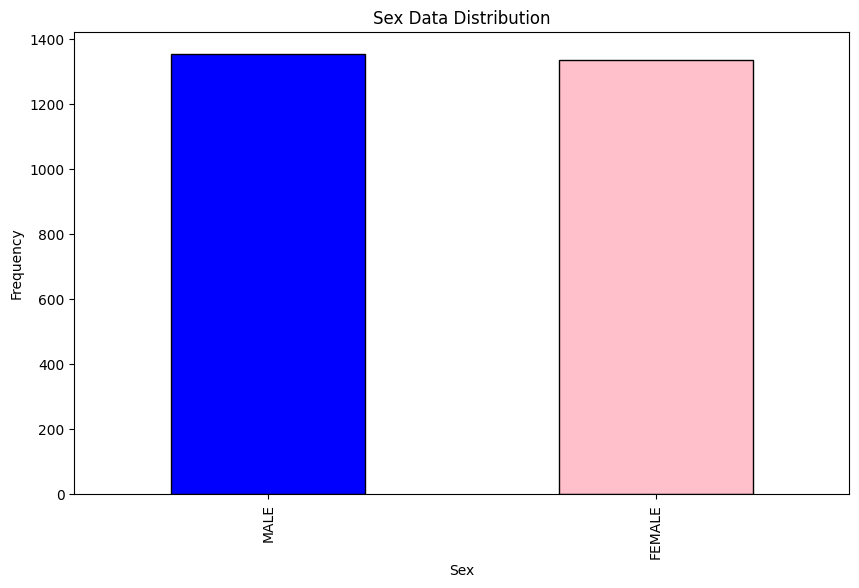

In [26]:
# ploting bar plot for simplified sex column

color_dict = {'MALE': 'blue', 'FEMALE': 'pink'}

# Plot the bar chart with specified colors
sex_category_counts.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in sex_category_counts.index])

# Adding labels and title
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.title('Sex Data Distribution')

# Display the plot
plt.show()

### Data Visualization and cleaning for 'age'

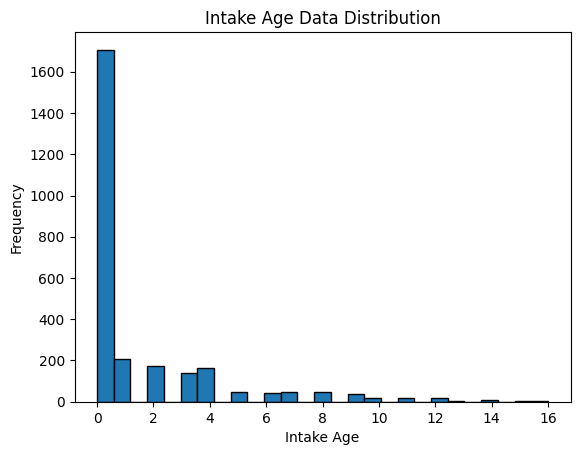

In [27]:
# ploting bar plot for age column
selected_df['intake_age'].plot(bins=27, kind='hist', edgecolor='black')

# category_counts = selected_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Intake Age')
plt.ylabel('Frequency')
plt.title('Intake Age Data Distribution')

# # Display the plot
plt.show()

In [28]:
age_category_counts = selected_df['intake_age'].value_counts()
age_category_counts

0     1707
1      209
2      173
4      162
3      140
7       47
5       47
8       46
6       43
9       38
11      19
10      19
12      18
14       6
16       5
15       4
13       4
Name: intake_age, dtype: int64

**Here we see histogram has outliers on right end and we need to remove these outliers for the sake of accurate prediction**

## Data visualization after cleaning for 'age'

In [29]:
selected_df= selected_df[selected_df['intake_age']<10]
age_category_counts2 = selected_df['intake_age'].value_counts()
age_category_counts2

0    1707
1     209
2     173
4     162
3     140
5      47
7      47
8      46
6      43
9      38
Name: intake_age, dtype: int64

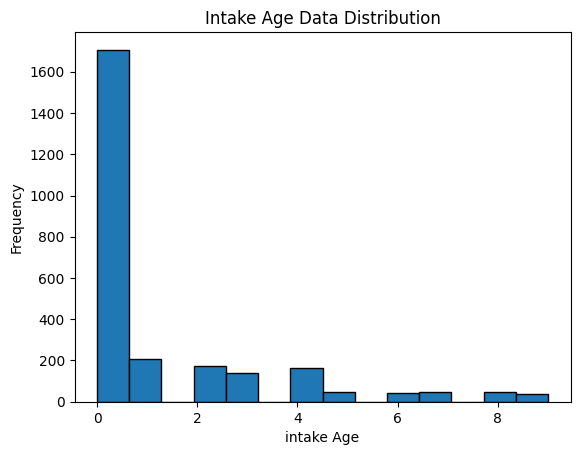

In [30]:
# ploting bar plot for age column
selected_df['intake_age'].plot(bins=14, kind='hist', edgecolor='black')

# category_counts = selected_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('intake Age')
plt.ylabel('Frequency')
plt.title('Intake Age Data Distribution')

# # Display the plot
plt.show()

## Data visualization & cleaning for 'intake_condition'

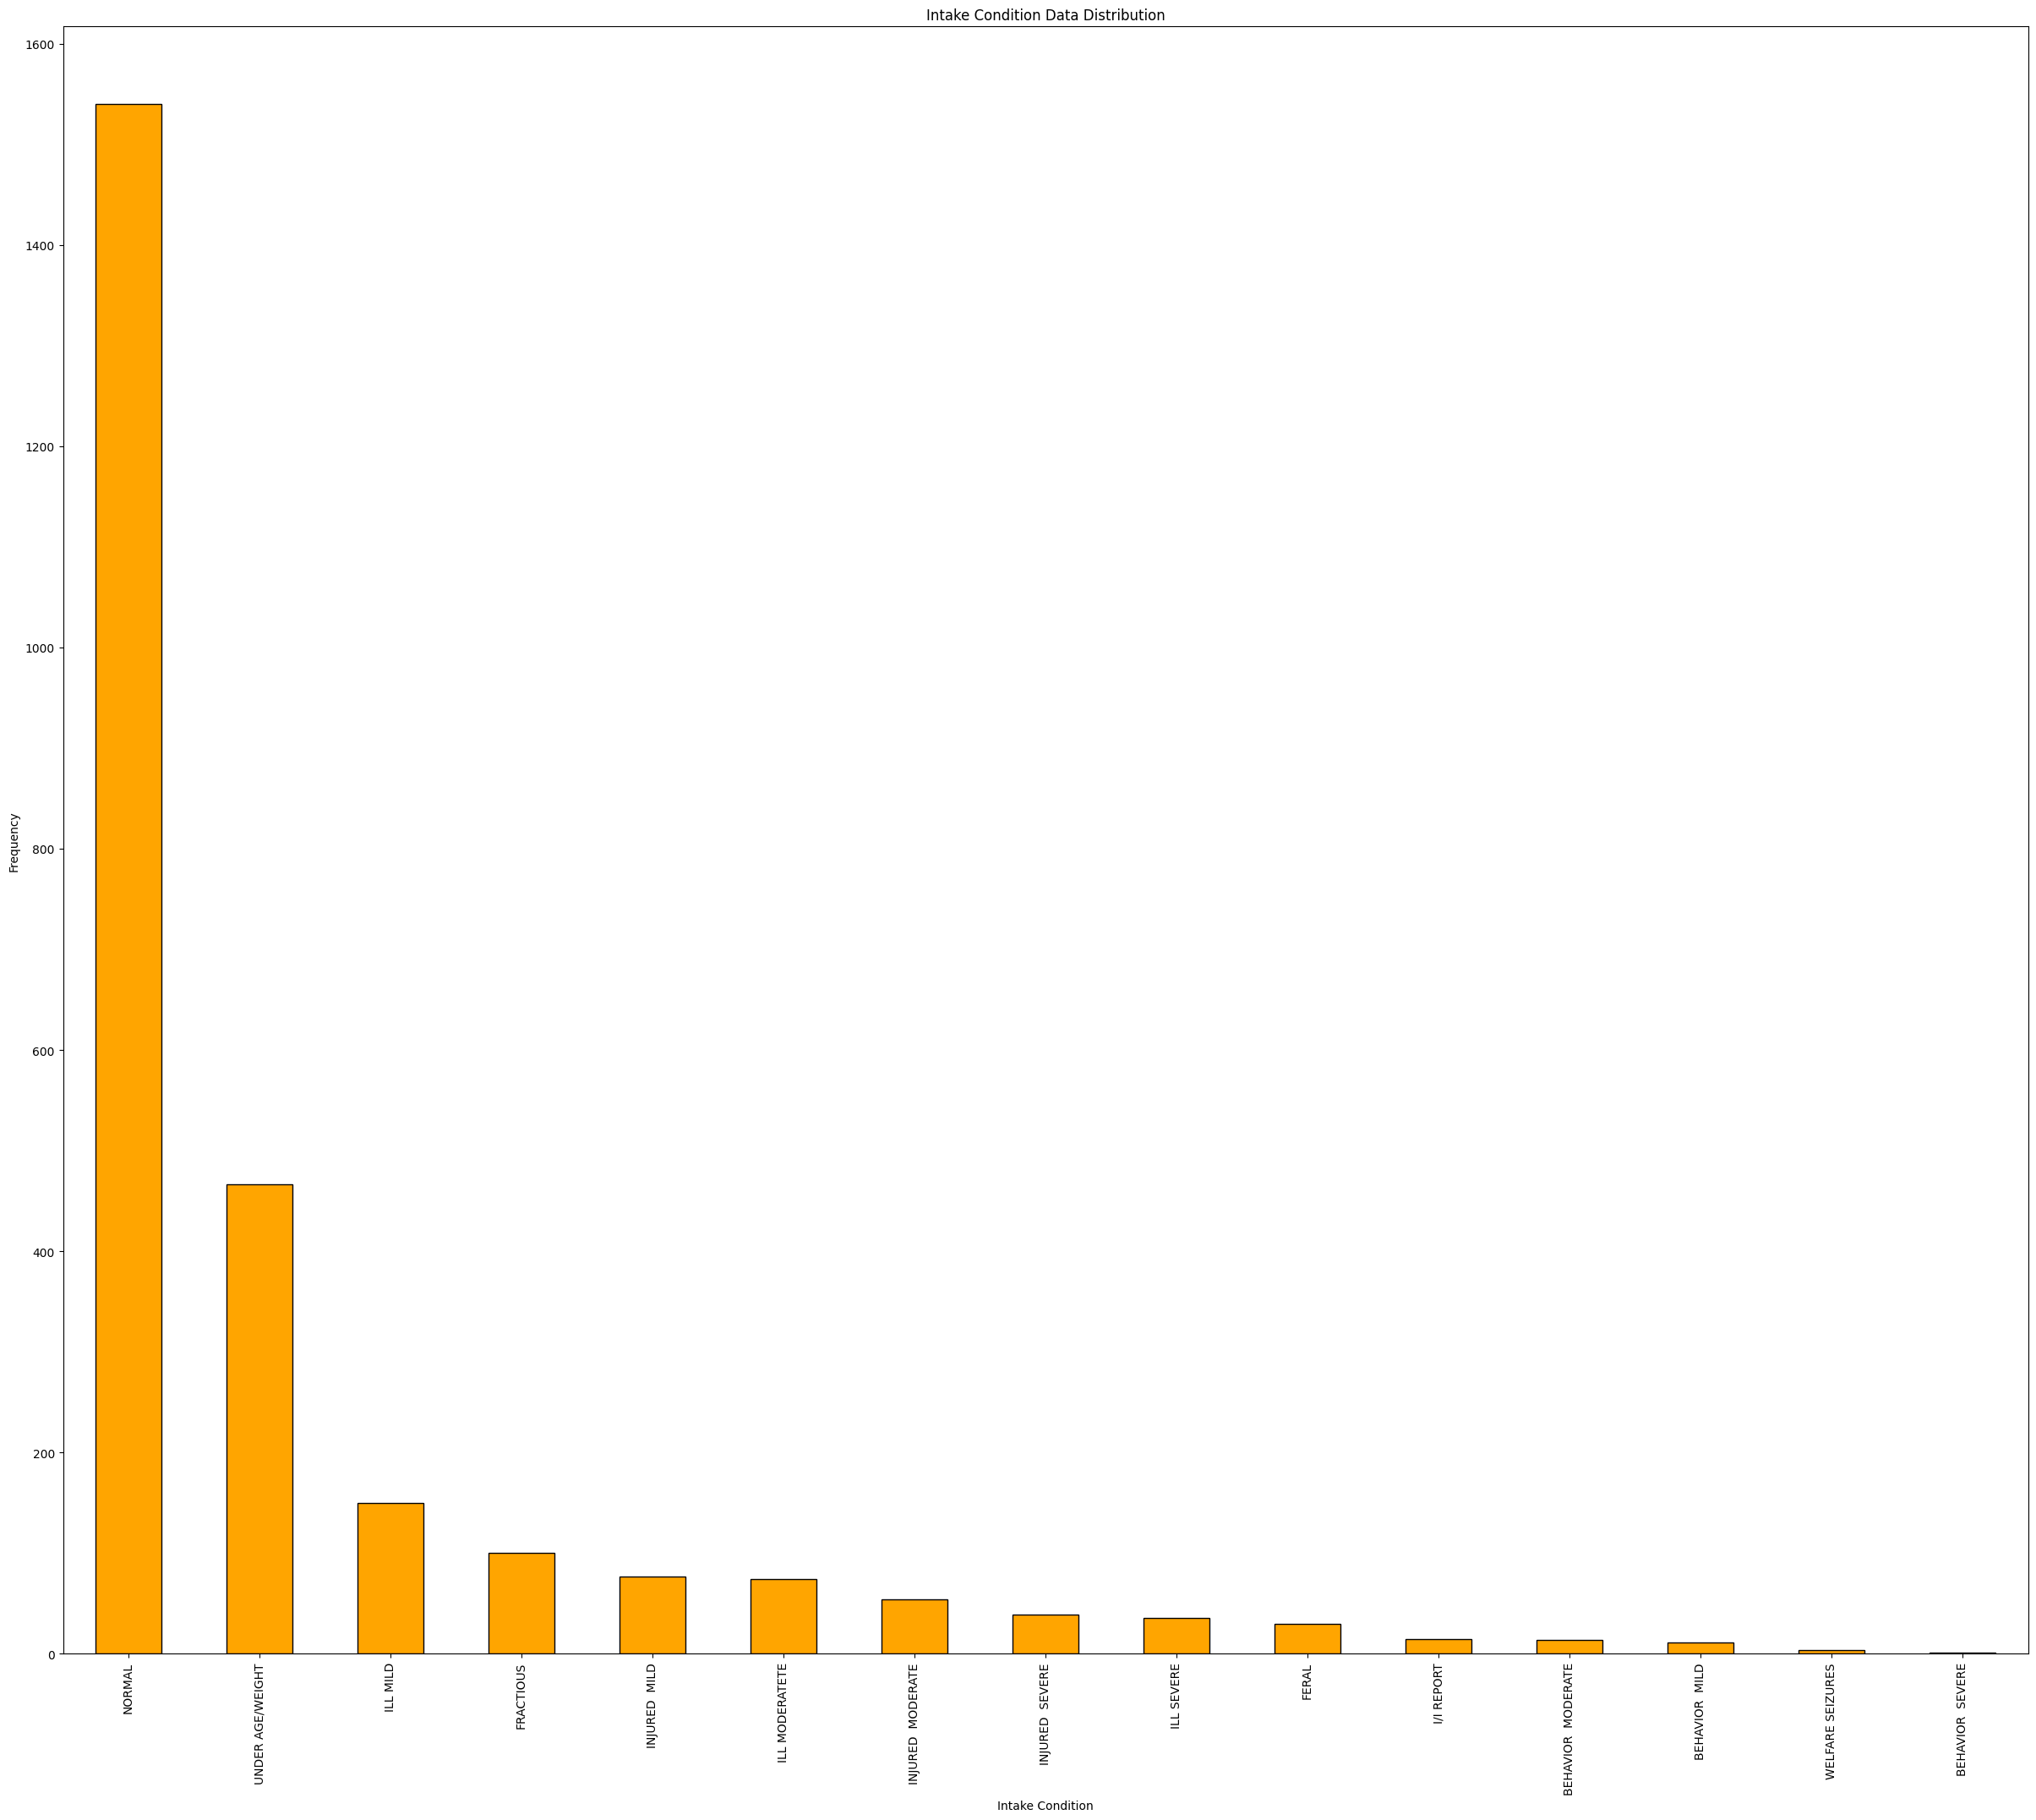

In [31]:
# ploting bar plot for Intake_Condition column
intake_condition_category_counts = selected_df['intake_condition'].value_counts()

intake_condition_category_counts.plot(kind='bar', color='orange', edgecolor='black', figsize= (30,25))

# Adding labels and title
plt.xlabel('Intake Condition')
plt.ylabel('Frequency')
plt.title('Intake Condition Data Distribution')

# Display the plot
plt.show()

In [32]:
intake_condition_category_counts

NORMAL                1540
UNDER AGE/WEIGHT       467
ILL MILD               150
FRACTIOUS              100
INJURED  MILD           77
ILL MODERATETE          74
INJURED  MODERATE       54
INJURED  SEVERE         39
ILL SEVERE              36
FERAL                   30
I/I REPORT              15
BEHAVIOR  MODERATE      14
BEHAVIOR  MILD          11
WELFARE SEIZURES         4
BEHAVIOR  SEVERE         1
Name: intake_condition, dtype: int64

In [35]:
def assign_condition(input_string):
    conditions_to_check = ['NORMAL']
    
    if any(condition in input_string for condition in conditions_to_check):
        return input_string
    elif 'UNDER AGE' in input_string or 'UNDER WEIGHT' in input_string:
        return 'UNDER WEIGHT'
    elif 'INJURED' in input_string:
        return 'INJURED'
    elif 'ILL' in input_string:
        return 'ILL'
    else:
        return 'OTHER'

selected_df['simplified_condition'] = selected_df['intake_condition'].apply(assign_condition)
selected_df.head()

,primary_color,sex,intake_age,intake_condition,intake_type,days_stayed,simplified_color,simplified_sex,simplified_condition
1,ORANGE,Spayed,8,NORMAL,OWNER SURRENDER,94,OTHER,FEMALE,NORMAL
2,TRICOLOR,Spayed,8,NORMAL,OWNER SURRENDER,17,OTHER,FEMALE,NORMAL
3,BLACK,Spayed,3,FERAL,OWNER SURRENDER,32,BLACK,FEMALE,OTHER
4,FLAME PT,Neutered,8,NORMAL,OWNER SURRENDER,48,OTHER,MALE,NORMAL
5,GRAY,Neutered,1,NORMAL,STRAY,8,GRAY,MALE,NORMAL


## Data visualization after cleaning for 'intake condition'

In [36]:
intake_condition_color_category_counts2 = selected_df['simplified_condition'].value_counts()
intake_condition_color_category_counts2

NORMAL          1540
UNDER WEIGHT     467
ILL              260
OTHER            175
INJURED          170
Name: simplified_condition, dtype: int64

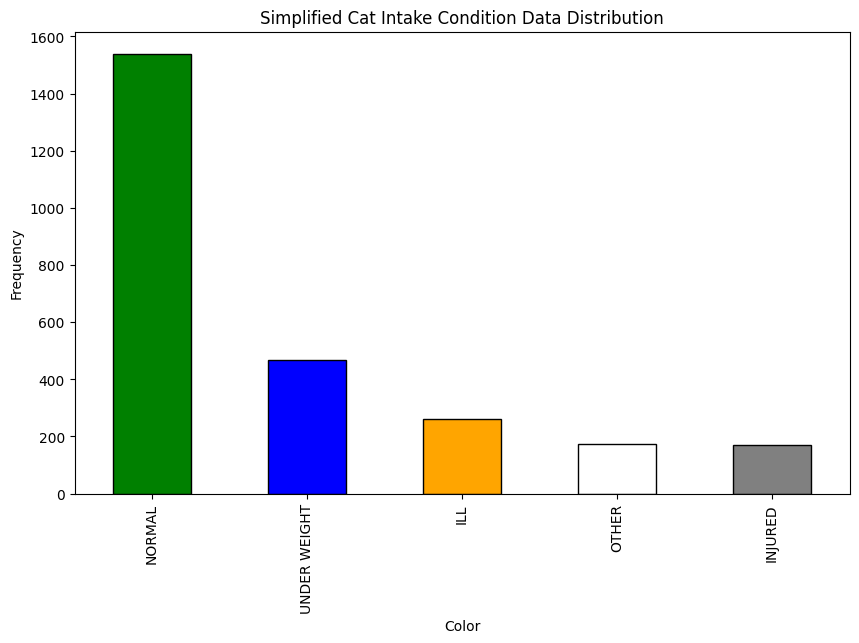

In [37]:
import matplotlib.pyplot as plt

# Create a color dictionary for each category
color_dict = {'NORMAL': 'green', 'UNDER WEIGHT': 'blue', 'OTHER': 'white', 'INJURED': 'gray', 'ILL': 'orange'}

# Plot the bar chart with specified colors
intake_condition_color_category_counts2.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in intake_condition_color_category_counts2.index])

# Adding labels and title
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Simplified Cat Intake Condition Data Distribution')

# Display the plot
plt.show()


## Data visualization and cleaning for 'intake type'

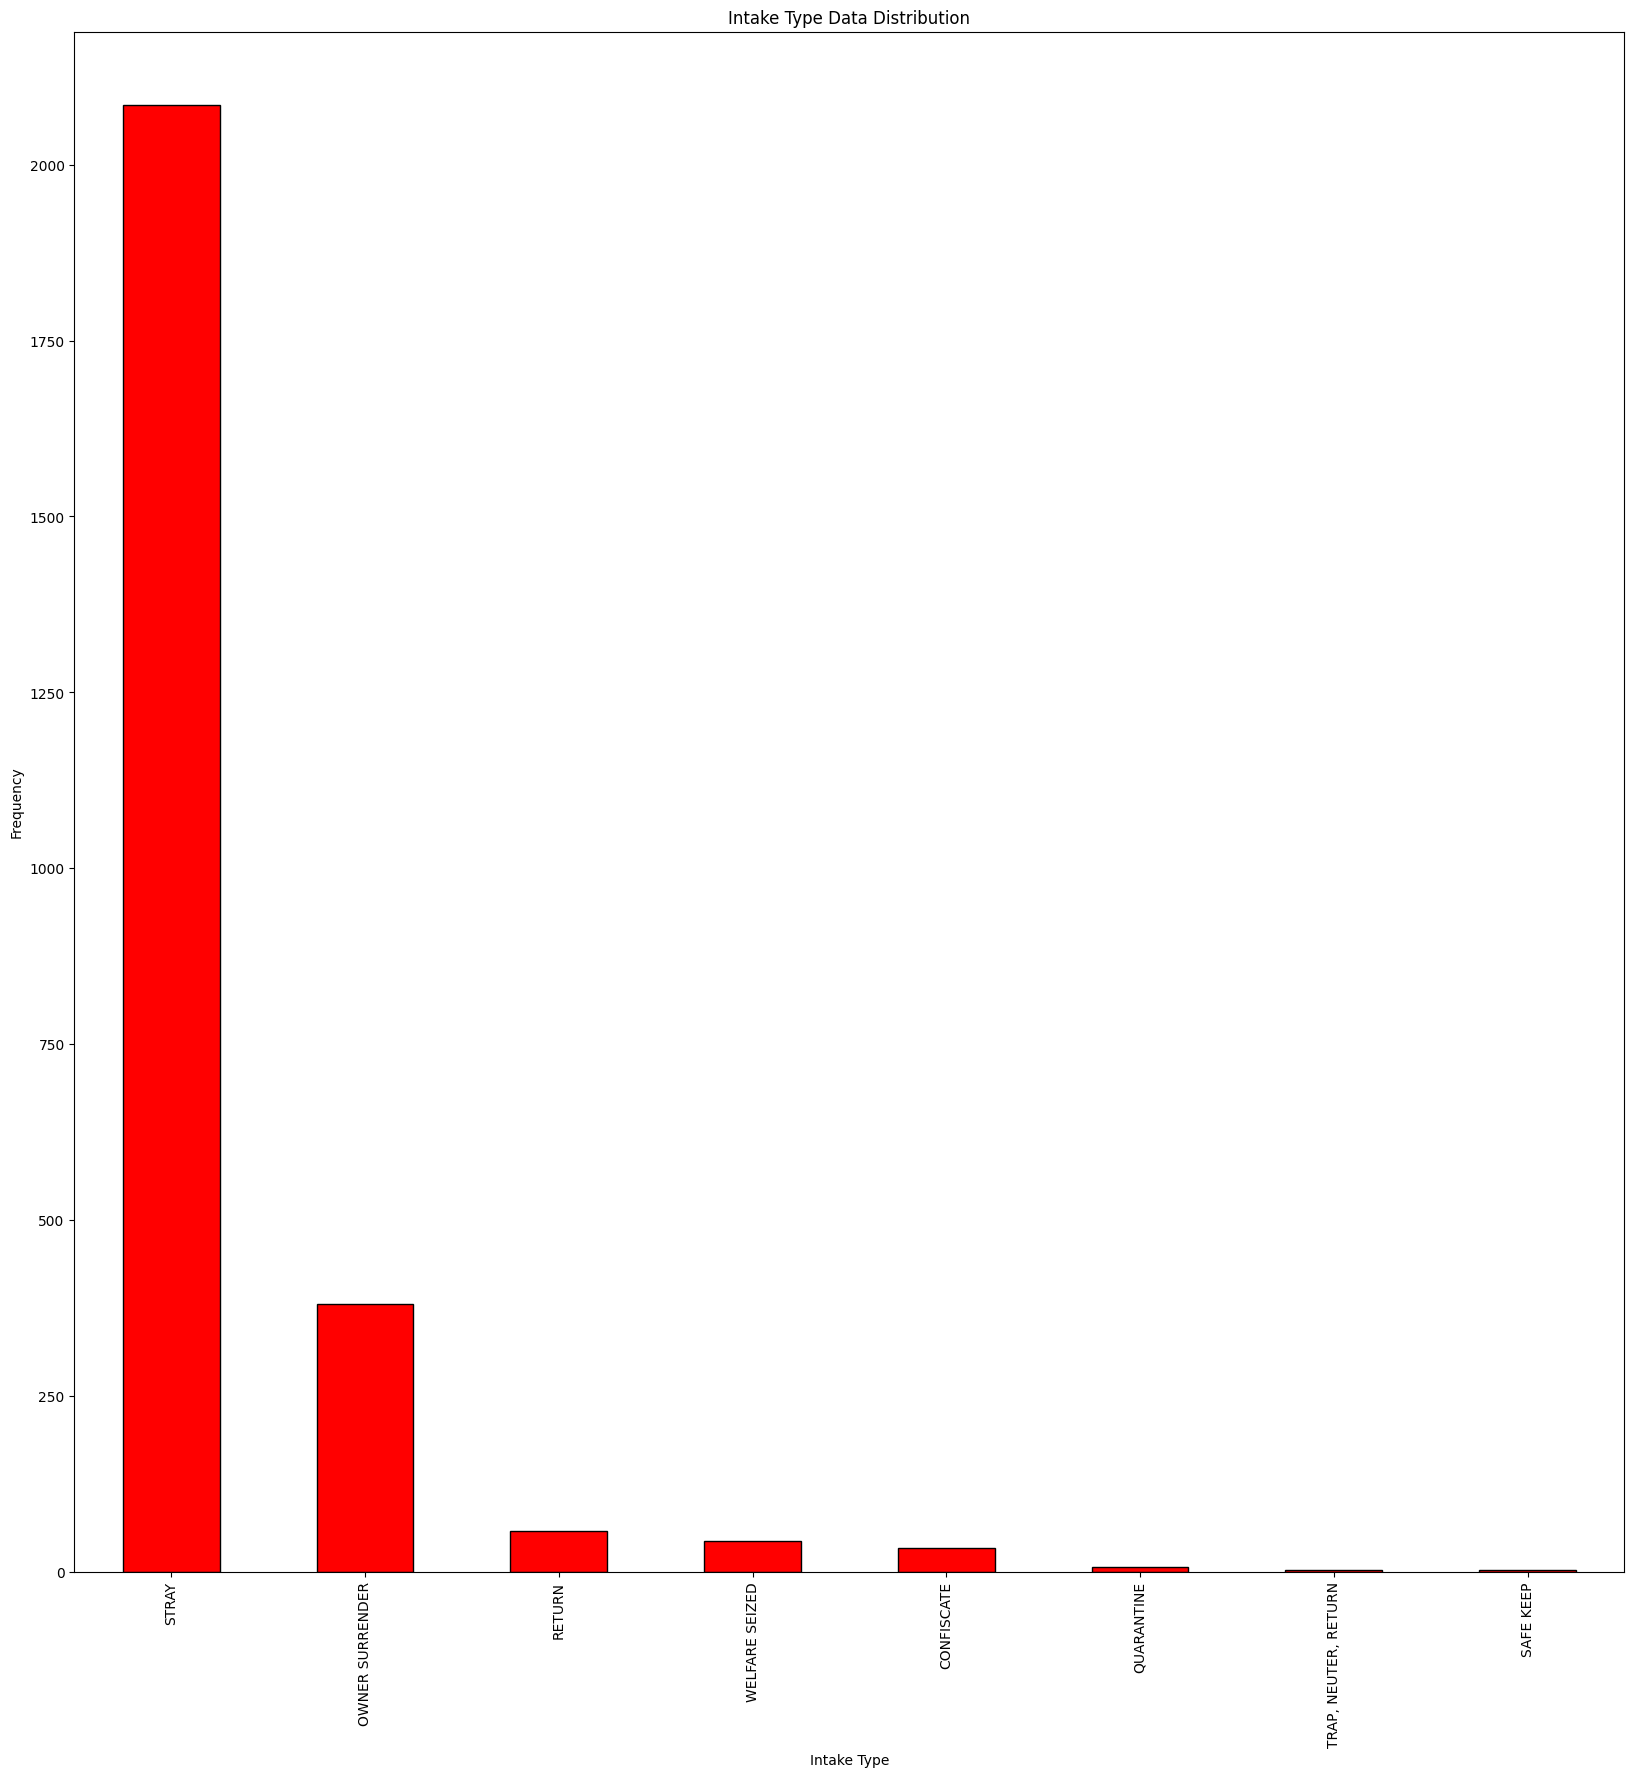

In [38]:
# ploting bar plot for Intake Type column

intake_type_category_counts = selected_df['intake_type'].value_counts()
intake_type_category_counts.plot(kind='bar', color='red', edgecolor='black', figsize= (20,20))

# Adding labels and title
plt.xlabel('Intake Type')
plt.ylabel('Frequency')
plt.title('Intake Type Data Distribution')

# Display the plot
plt.show()

**At this point I don't think Intake Type has any significance on prediction**

In [39]:
intake_type_category_counts

STRAY                   2085
OWNER SURRENDER          380
RETURN                    58
WELFARE SEIZED            44
CONFISCATE                34
QUARANTINE                 7
TRAP, NEUTER, RETURN       2
SAFE KEEP                  2
Name: intake_type, dtype: int64

In [40]:
def assign_type(input_string):
    type_to_check = ['STRAY', 'OWNER SURRENDER']
    
    if any(condition in input_string for condition in type_to_check):
        return input_string
    else:
        return 'OTHER'

selected_df['simplified_type'] = selected_df['intake_type'].apply(assign_type)
selected_df.head()

,primary_color,sex,intake_age,intake_condition,intake_type,days_stayed,simplified_color,simplified_sex,simplified_condition,simplified_type
1,ORANGE,Spayed,8,NORMAL,OWNER SURRENDER,94,OTHER,FEMALE,NORMAL,OWNER SURRENDER
2,TRICOLOR,Spayed,8,NORMAL,OWNER SURRENDER,17,OTHER,FEMALE,NORMAL,OWNER SURRENDER
3,BLACK,Spayed,3,FERAL,OWNER SURRENDER,32,BLACK,FEMALE,OTHER,OWNER SURRENDER
4,FLAME PT,Neutered,8,NORMAL,OWNER SURRENDER,48,OTHER,MALE,NORMAL,OWNER SURRENDER
5,GRAY,Neutered,1,NORMAL,STRAY,8,GRAY,MALE,NORMAL,STRAY


## Data visualization after cleaning for 'intake type'

In [41]:
intake_type_category_counts2 = selected_df['simplified_type'].value_counts()
intake_type_category_counts2

STRAY              2085
OWNER SURRENDER     380
OTHER               147
Name: simplified_type, dtype: int64

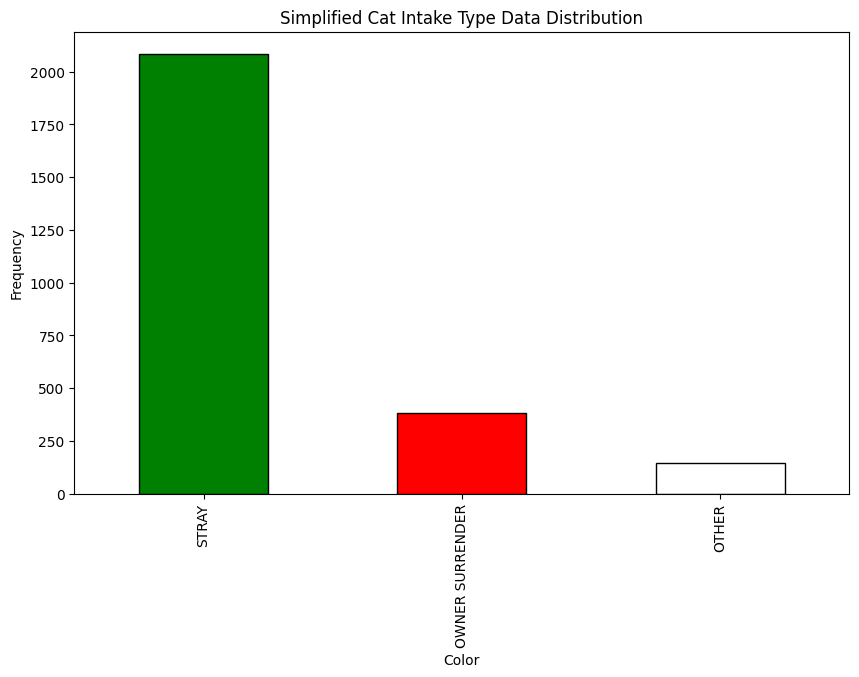

In [42]:
import matplotlib.pyplot as plt

# Create a color dictionary for each category
color_dict = {'STRAY': 'green', 'OTHER': 'white', 'OWNER SURRENDER': 'red'}

# Plot the bar chart with specified colors
intake_type_category_counts2.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=[color_dict.get(x, 'blue') for x in intake_type_category_counts2.index])

# Adding labels and title
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.title('Simplified Cat Intake Type Data Distribution')

# Display the plot
plt.show()


## Data visualization and cleaning for 'days stayed'

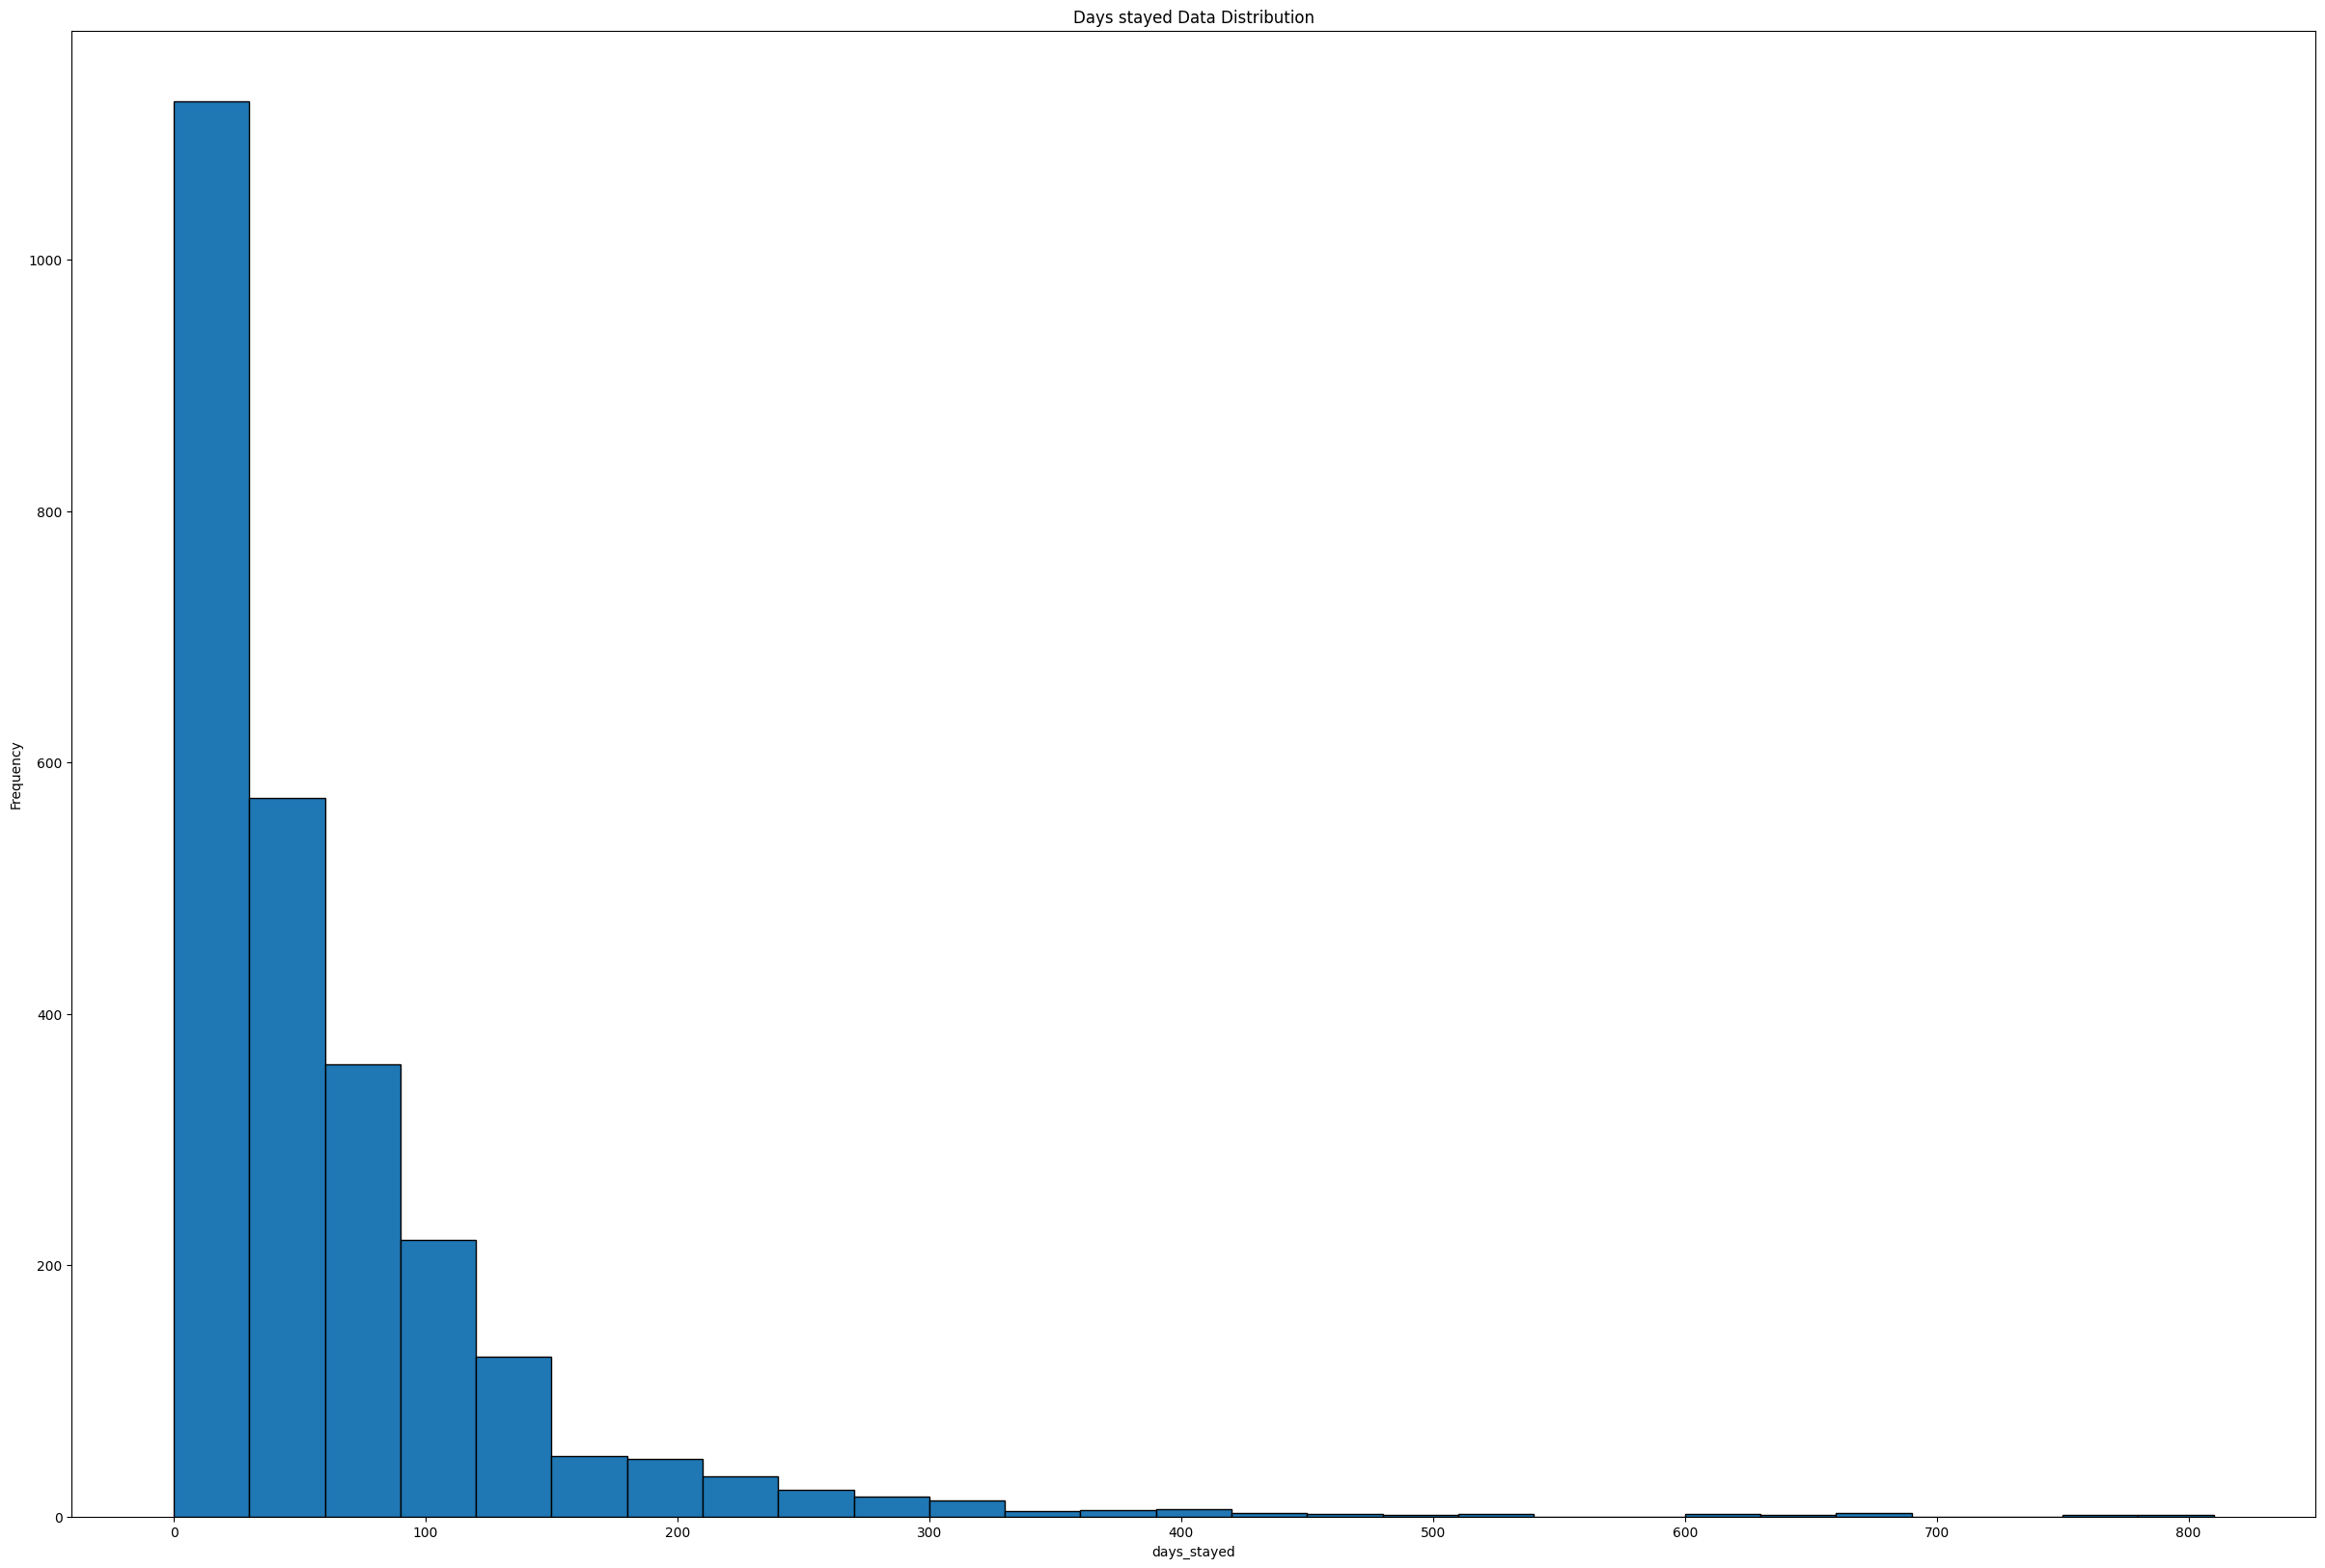

In [43]:
# ploting bar plot for days stayed column
# Calculate bin edges programmatically
bin_width = 30  # Adjust this based on your preference
min_value = int(np.floor(min(selected_df['days_stayed']) / bin_width) * bin_width)
max_value = int(np.ceil(max(selected_df['days_stayed']) / bin_width) * bin_width)
bins = range(min_value, max_value + bin_width, bin_width)

selected_df['days_stayed'].plot(bins= bins, kind='hist', edgecolor='black', figsize= (30,20))

# category_counts = selected_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('days_stayed')
plt.ylabel('Frequency')
plt.title('Days stayed Data Distribution')

# # Display the plot
plt.show()

**Here we see a good amount of the cat leaves shelter with in a month and most of them leaves by 6 months. But for some exceptional cases cat stays upto several years, and we have to remove outliers for there cases**

In [45]:
## Data visualization after cleaning for 'days stayed'

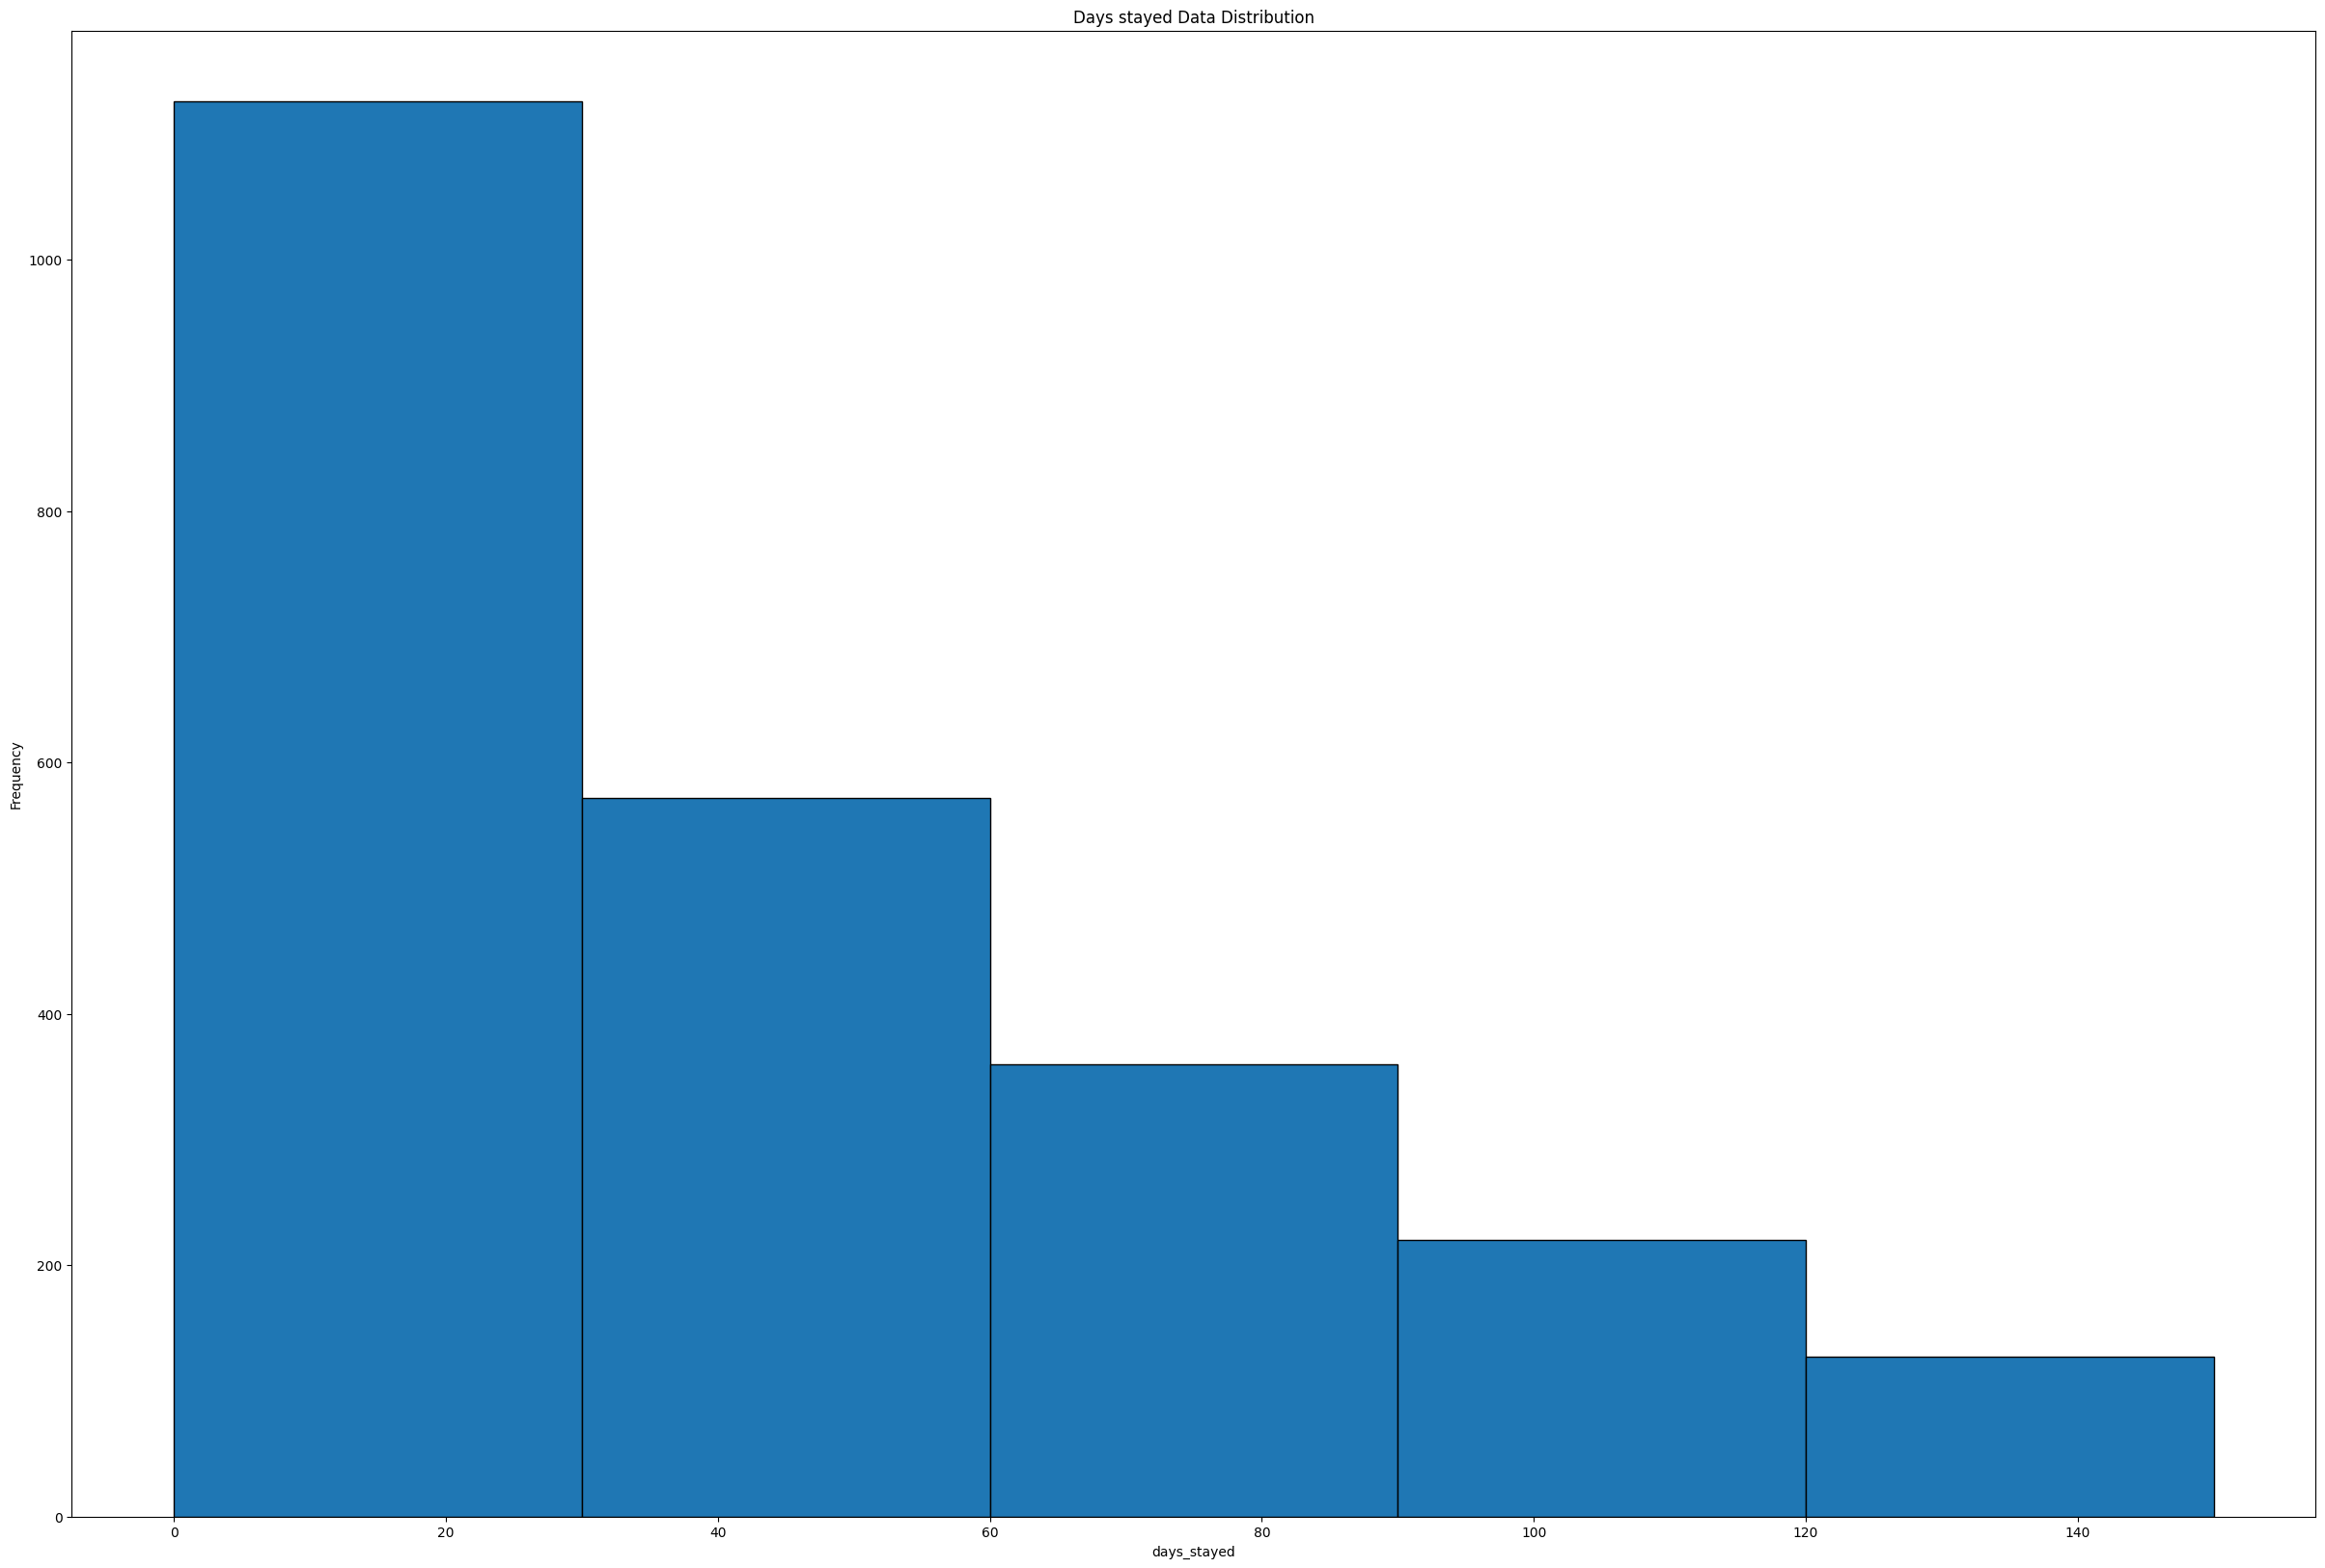

In [45]:
selected_df = selected_df[selected_df['days_stayed']<150]

bin_width = 30  # Adjust this based on your preference
min_value = int(np.floor(min(selected_df['days_stayed']) / bin_width) * bin_width)
max_value = int(np.ceil(max(selected_df['days_stayed']) / bin_width) * bin_width)
bins = range(min_value, max_value + bin_width, bin_width)

selected_df['days_stayed'].plot(bins= bins, kind='hist', edgecolor='black', figsize= (30,20))

# category_counts = selected_df['Sex'].value_counts()
# category_counts.plot(kind='bar', color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('days_stayed')
plt.ylabel('Frequency')
plt.title('Days stayed Data Distribution')

# # Display the plot
plt.show()

In [46]:
selected_df.head()

,primary_color,sex,intake_age,intake_condition,intake_type,days_stayed,simplified_color,simplified_sex,simplified_condition,simplified_type
1,ORANGE,Spayed,8,NORMAL,OWNER SURRENDER,94,OTHER,FEMALE,NORMAL,OWNER SURRENDER
2,TRICOLOR,Spayed,8,NORMAL,OWNER SURRENDER,17,OTHER,FEMALE,NORMAL,OWNER SURRENDER
3,BLACK,Spayed,3,FERAL,OWNER SURRENDER,32,BLACK,FEMALE,OTHER,OWNER SURRENDER
4,FLAME PT,Neutered,8,NORMAL,OWNER SURRENDER,48,OTHER,MALE,NORMAL,OWNER SURRENDER
5,GRAY,Neutered,1,NORMAL,STRAY,8,GRAY,MALE,NORMAL,STRAY


In [47]:
selected_columns = ['simplified_color', 'simplified_sex', 'intake_age', 'simplified_condition','simplified_type', 'days_stayed']

selected_df = selected_df[selected_columns]
selected_df.head()

,simplified_color,simplified_sex,intake_age,simplified_condition,simplified_type,days_stayed
1,OTHER,FEMALE,8,NORMAL,OWNER SURRENDER,94
2,OTHER,FEMALE,8,NORMAL,OWNER SURRENDER,17
3,BLACK,FEMALE,3,OTHER,OWNER SURRENDER,32
4,OTHER,MALE,8,NORMAL,OWNER SURRENDER,48
5,GRAY,MALE,1,NORMAL,STRAY,8


# Exporting cleaned dataset

In [48]:
selected_df.to_csv("../dataset/long_beach_cleaned_data_nov_29.csv", index = False)